# From video 
Predict the digit in an image.  This is an example of binary classification problem.  

Predicting if the number in the image is a 3.

https://youtu.be/pXdum128xww

In [1]:
from sklearn.datasets import fetch_openml

In [10]:
# Get the image datasets from online
mnist = fetch_openml('mnist_784')

### Explore the dataset

In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [5]:
%matplotlib inline

In [6]:
import matplotlib
import matplotlib.pyplot as plt

In [7]:
X,Y = mnist['data'], mnist['target']

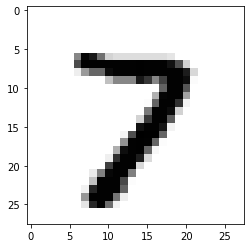

In [14]:
# Pick one of the image to look at
random_digit = X[4000]
some_random_digit = random_digit.reshape(28,28)  # reshape the actual image
plt.imshow(some_random_digit, cmap=matplotlib.cm.binary, interpolation="nearest")

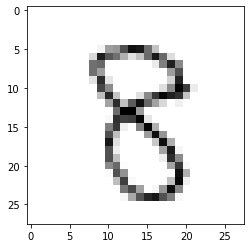

In [15]:
# Pick one of the image to look at
random_digit = X[3600]
some_random_digit = random_digit.reshape(28,28)  # reshape the actual image
plt.imshow(some_random_digit, cmap=matplotlib.cm.binary, interpolation="nearest")

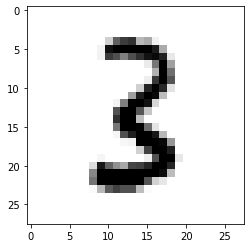

In [16]:
# Pick one of the image to look at
random_digit = X[50000]
some_random_digit = random_digit.reshape(28,28)  # reshape the actual image
plt.imshow(some_random_digit, cmap=matplotlib.cm.binary, interpolation="nearest")

### Splitting Dataset into training and testing

In [18]:
# Take first 6000 as training, then the next 1000 as testing
x_train, x_test = X[:6000], X[6000:7000]
y_train, y_test = Y[:6000], Y[6000:7000]

In [19]:
# Shuffle the data to make it more efficient
import numpy as np

shuffle_index = np.random.permutation(6000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [24]:
y_train

array(['7', '5', '4', ..., '4', '3', '3'], dtype=object)

In [41]:
# Create predictor
# convert the dataset to integer type for using ==
y_train = y_train.astype(np.int8)
y_test = y_train.astype(np.int8)

In [42]:
# The Y label has the actual digit.  Here, we are going to make prediction of True/False of a digit.
# Let's try to set the training and testing label to True/False for predicting 3. If digit is 3, True.
y_train_2 = (y_train == 3)
y_test_2 = (y_test == 3)

y_test_2

array([False, False, False, ..., False,  True,  True])

In [31]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(tol=0.1)  # tolerance 0.1
clf.fit(x_train, y_train_2)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [33]:
y_pred = clf.predict([random_digit])
y_pred
# random_digit was assigned earlier, and it has a 3.  So prediction True is Correct, True Positive.  

array([ True])

### Use cross_val_score() to calculate accuracy

In [35]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring='accuracy')

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [36]:
# Use the mean to calculate accuracy
a.mean()

0.9486666666666667

### Use SVC as the classifer to do the same

In [43]:
from sklearn import svm

clf = svm.SVC()
clf.fit(x_train, y_train_2)
y_pred = clf.predict([random_digit])
y_pred
# Prediction of True is correct for 3.

array([ True])

In [44]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring='accuracy')

In [45]:
a.mean()

0.9865

## SVC has a higher accuracy in this case than the LogisticRegression